# Stock Market Price Movement Prediction
## Part 2: Feature Engineering & Data Preprocessing

This notebook covers:
1. Loading the acquired stock data
2. Advanced feature engineering
3. Data preprocessing (handling missing values, scaling, etc.)
4. Creating train/test splits
5. Data quality analysis

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-darkgrid')


## 2. Load the Data

In [ ]:
df = pd.read_csv('combined_stock_data_with_features.csv')

df['Date'] = pd.to_datetime(df['Date'])

print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nNumber of unique tickers: {df['Ticker'].nunique()}")
print(f"\nDate range: {df['Date'].min()} to {df['Date'].max()}")
print(f"\nFirst few rows:")
df.head()

Dataset shape: (64792, 27)

Columns: ['Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'Ticker', 'Daily_Return', 'Daily_Range', 'Price_Change', 'Day_of_Week', 'Month', 'Year', 'Daily_Volatility', 'SMA_20', 'SMA_50', 'SMA_200', 'EMA_12', 'EMA_26', 'MACD', 'MACD_Signal', 'RSI', 'BB_Upper', 'BB_Lower', 'BB_Width', 'OBV', 'Target']

Number of unique tickers: 28

Date range: 2016-07-22 00:00:00 to 2025-10-03 00:00:00

First few rows:


,Date,Close,High,Low,Open,Volume,Ticker,Daily_Return,Daily_Range,Price_Change,Day_of_Week,Month,Year,Daily_Volatility,SMA_20,SMA_50,SMA_200,EMA_12,EMA_26,MACD,MACD_Signal,RSI,BB_Upper,BB_Lower,BB_Width,OBV,Target
0,2016-07-22,120.258644,120.268585,118.578996,119.165385,18422400,AAPL,0.003234,1.689589,1.093259,4,7,2016,0.015043,115.816523,116.117966,108.251809,118.104486,116.678135,1.426350,0.805099,73.827906,122.410713,109.222334,13.188379,272723000,1
1,2016-07-25,120.884781,121.103434,117.058371,120.646253,18487400,AAPL,0.005207,4.045063,0.238527,0,7,2016,0.013445,116.291098,116.144801,108.397063,118.532223,116.989739,1.542485,0.952576,74.916221,122.911062,109.671134,13.239928,291210400,0
2,2016-07-26,120.477295,121.322086,120.010173,121.252515,17612000,AAPL,-0.003371,1.311912,-0.775220,1,7,2016,0.011338,116.899846,116.172828,108.539932,118.831465,117.248076,1.583389,1.078739,67.628757,122.602223,111.197468,11.404754,273598400,1
3,2016-07-27,122.584297,124.234130,120.765515,121.669936,52654200,AAPL,0.017489,3.468615,0.914361,2,7,2016,0.009579,117.428585,116.265656,108.689510,119.408824,117.643352,1.765472,1.216085,76.579160,123.182530,111.674641,11.507889,326252600,1
4,2016-07-28,124.234146,127.543746,122.872537,126.738703,78955800,AAPL,0.013459,4.671208,-2.504557,3,7,2016,0.009603,117.967265,116.417719,108.842269,120.151181,118.131559,2.019622,1.376793,77.019567,124.157738,111.776792,12.380947,405208400,0


## 3. Initial Data Quality Check

In [ ]:
print("Data Types:")
print(df.dtypes)
print("\n" + "="*60)

print("\nMissing Values:")
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing_values,
    'Missing_Percent': missing_percent
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
print(missing_df)

# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")

print("\n" + "="*60)
print("\nBasic Statistics:")
df.describe()

Data Types:
Date                datetime64[ns]
Close                      float64
High                       float64
Low                        float64
Open                       float64
Volume                       int64
Ticker                      object
Daily_Return               float64
Daily_Range                float64
Price_Change               float64
Day_of_Week                  int64
Month                        int64
Year                         int64
Daily_Volatility           float64
SMA_20                     float64
SMA_50                     float64
SMA_200                    float64
EMA_12                     float64
EMA_26                     float64
MACD                       float64
MACD_Signal                float64
RSI                        float64
BB_Upper                   float64
BB_Lower                   float64
BB_Width                   float64
OBV                          int64
Target                       int64
dtype: object


Missing Values:
Empty DataF

,Date,Close,High,Low,Open,Volume,Daily_Return,Daily_Range,Price_Change,Day_of_Week,Month,Year,Daily_Volatility,SMA_20,SMA_50,SMA_200,EMA_12,EMA_26,MACD,MACD_Signal,RSI,BB_Upper,BB_Lower,BB_Width,OBV,Target
count,64792,64792.000000,64792.000000,64792.000000,64792.000000,6.479200e+04,64792.000000,64792.000000,64792.000000,64792.000000,64792.000000,64792.000000,64792.000000,64792.000000,64792.000000,64792.000000,64792.000000,64792.000000,64792.000000,64792.000000,64792.000000,64792.000000,64792.000000,64792.000000,6.479200e+04,64792.000000
mean,2021-02-24 21:33:45.583405568,326.803099,330.183418,323.232365,326.721742,2.653591e+07,0.000933,6.951053,0.081357,2.027226,6.585134,2020.647364,0.017585,324.711023,321.397064,304.960344,325.600213,324.053067,1.547147,1.546299,54.818407,343.604948,305.817097,37.787851,2.878379e+09,0.531748
min,2016-07-22 00:00:00,1.341951,1.341951,1.301449,1.311023,5.436000e+05,-0.263901,0.014237,-43.881994,0.000000,1.000000,2016.000000,0.003629,1.232413,1.162197,0.868440,1.286816,1.232467,-49.615318,-44.304326,3.560628,1.396328,1.068498,0.082569,-2.460540e+07,0.000000
25%,2018-11-06 00:00:00,176.879593,178.755888,175.319204,177.008807,2.410375e+06,-0.007395,2.991553,-1.928116,1.000000,4.000000,2018.000000,0.010679,176.412783,175.520239,167.759511,176.693046,176.365507,-1.258171,-1.062697,42.654452,186.495523,166.331879,15.720962,1.601018e+08,0.000000
50%,2021-02-25 12:00:00,270.204254,273.305168,267.441306,270.333493,4.234900e+06,0.001051,5.516014,0.057666,2.000000,7.000000,2021.000000,0.014654,268.985046,267.364975,244.933657,269.721542,269.007254,1.497882,1.504363,55.813000,284.857376,252.419216,28.765671,3.236004e+08,1.000000
75%,2023-06-14 00:00:00,468.869354,473.106320,463.327790,468.330157,1.615795e+07,0.009716,9.177682,2.206835,3.000000,9.000000,2023.000000,0.020714,467.846263,470.647665,462.510261,468.871139,470.019359,4.708066,4.441628,67.260312,494.395951,440.156973,48.397123,9.044336e+08,1.000000
max,2025-10-03 00:00:00,1073.970825,1075.337145,1065.144580,1073.591826,3.692928e+09,0.298067,85.656265,76.389656,4.000000,12.000000,2025.000000,0.087022,1046.330701,1003.367975,974.666659,1041.900153,1024.584380,33.954661,28.431282,100.000000,1123.670585,1017.632039,326.635864,1.051671e+11,1.000000
std,NaN,199.626582,201.467954,197.656776,199.640725,9.918517e+07,0.020590,5.820999,5.355474,1.399678,3.400782,2.679712,0.010843,198.065205,195.424684,182.512964,198.619939,197.304604,7.419142,6.931544,16.821701,208.713590,188.370712,34.212203,1.300645e+10,0.498995


## 4. Advanced Feature Engineering

In [4]:
df_features = df.copy()
df_features = df_features.sort_values(['Ticker', 'Date']).reset_index(drop=True)

print("Creating advanced features...")

for ticker in df_features['Ticker'].unique():
    mask = df_features['Ticker'] == ticker
    ticker_data = df_features[mask].copy()
    
    df_features.loc[mask, 'Close_Lag1'] = ticker_data['Close'].shift(1)
    df_features.loc[mask, 'Close_Lag2'] = ticker_data['Close'].shift(2)
    df_features.loc[mask, 'Close_Lag3'] = ticker_data['Close'].shift(3)
    df_features.loc[mask, 'Volume_Lag1'] = ticker_data['Volume'].shift(1)
    
    df_features.loc[mask, 'Close_Roll_Mean_5'] = ticker_data['Close'].rolling(window=5).mean()
    df_features.loc[mask, 'Close_Roll_Std_5'] = ticker_data['Close'].rolling(window=5).std()
    df_features.loc[mask, 'Close_Roll_Mean_10'] = ticker_data['Close'].rolling(window=10).mean()
    df_features.loc[mask, 'Close_Roll_Std_10'] = ticker_data['Close'].rolling(window=10).std()
    
    df_features.loc[mask, 'Momentum_5'] = ticker_data['Close'] - ticker_data['Close'].shift(5)
    df_features.loc[mask, 'Momentum_10'] = ticker_data['Close'] - ticker_data['Close'].shift(10)
    df_features.loc[mask, 'Momentum_20'] = ticker_data['Close'] - ticker_data['Close'].shift(20)
    
    df_features.loc[mask, 'High_Low_Ratio'] = ticker_data['High'] / ticker_data['Low']
    df_features.loc[mask, 'Close_Open_Ratio'] = ticker_data['Close'] / ticker_data['Open']
    
    df_features.loc[mask, 'Cumulative_Return_5'] = ticker_data['Daily_Return'].rolling(window=5).sum()
    df_features.loc[mask, 'Cumulative_Return_10'] = ticker_data['Daily_Return'].rolling(window=10).sum()
    
    df_features.loc[mask, 'Volume_MA_20'] = ticker_data['Volume'].rolling(window=20).mean()
    df_features.loc[mask, 'Volume_Ratio_20'] = ticker_data['Volume'] / ticker_data['Volume'].rolling(window=20).mean()

df_features['Price_Volume_Interaction'] = df_features['Close'] * df_features['Volume']
df_features['Volatility_Volume_Interaction'] = df_features['Daily_Volatility'] * df_features['Volume']

print(f"\nNew shape after feature engineering: {df_features.shape}")
print(f"Total features: {df_features.shape[1]}")
print(f"\nNew features created: {df_features.shape[1] - df.shape[1]}")

Creating advanced features...

New shape after feature engineering: (64792, 46)
Total features: 46

New features created: 19


## 5. Handle Missing Values

In [5]:
print("Missing values after feature engineering:")
missing_after = df_features.isnull().sum()
missing_after_percent = (missing_after / len(df_features)) * 100
missing_after_df = pd.DataFrame({
    'Missing_Count': missing_after,
    'Missing_Percent': missing_after_percent
})
missing_after_df = missing_after_df[missing_after_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
print(missing_after_df)

print(f"\nRows before dropping missing Target: {len(df_features)}")
df_features = df_features.dropna(subset=['Target'])
print(f"Rows after dropping missing Target: {len(df_features)}")
print(f"\nRows before dropping other missing values: {len(df_features)}")
df_features = df_features.dropna()
print(f"Rows after dropping missing values: {len(df_features)}")

print(f"\nFinal dataset shape: {df_features.shape}")

Missing values after feature engineering:
                      Missing_Count  Missing_Percent
Momentum_20                     560         0.864304
Volume_MA_20                    532         0.821089
Volume_Ratio_20                 532         0.821089
Momentum_10                     280         0.432152
Close_Roll_Mean_10              252         0.388937
Close_Roll_Std_10               252         0.388937
Cumulative_Return_10            252         0.388937
Momentum_5                      140         0.216076
Close_Roll_Mean_5               112         0.172861
Close_Roll_Std_5                112         0.172861
Cumulative_Return_5             112         0.172861
Close_Lag3                       84         0.129646
Close_Lag2                       56         0.086430
Close_Lag1                       28         0.043215
Volume_Lag1                      28         0.043215

Rows before dropping missing Target: 64792
Rows after dropping missing Target: 64792

Rows before dropping ot

## 6. Exploratory Data Analysis (EDA)

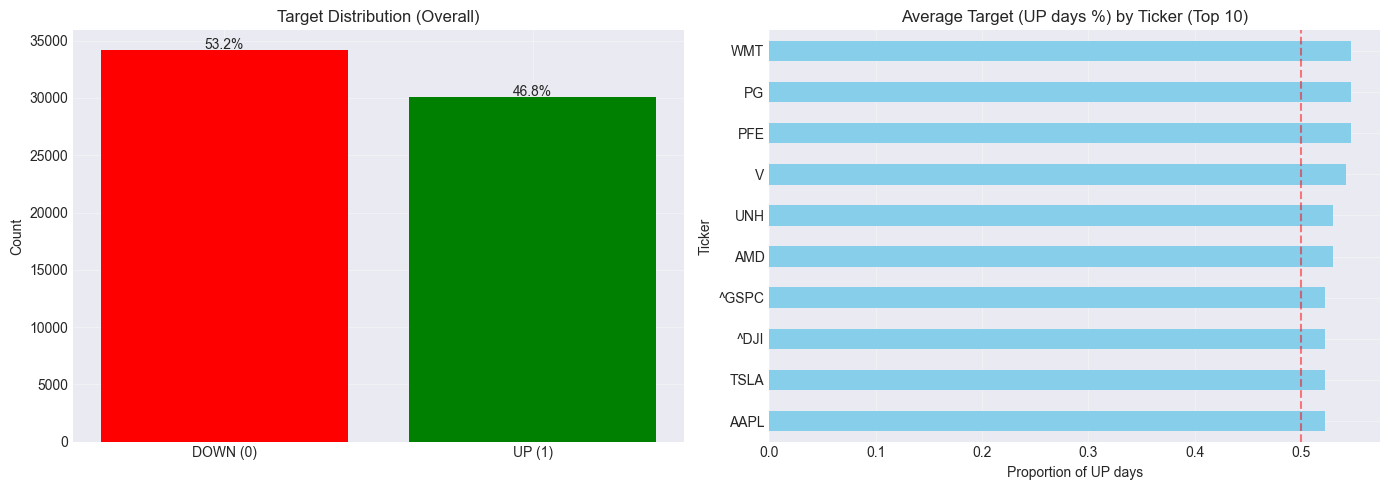


Class Balance:
DOWN days (0): 30042 (46.77%)
UP days (1): 34190 (53.23%)


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

target_counts = df_features['Target'].value_counts()
axes[0].bar(['DOWN (0)', 'UP (1)'], target_counts.values, color=['red', 'green'])
axes[0].set_title('Target Distribution (Overall)')
axes[0].set_ylabel('Count')
axes[0].grid(True, alpha=0.3)


for i, v in enumerate(target_counts.values):
    axes[0].text(i, v + 100, f'{v/len(df_features)*100:.1f}%', ha='center')

top_tickers = df_features['Ticker'].value_counts().head(10).index
target_by_ticker = df_features[df_features['Ticker'].isin(top_tickers)].groupby('Ticker')['Target'].mean()
target_by_ticker.sort_values().plot(kind='barh', ax=axes[1], color='skyblue')
axes[1].set_title('Average Target (UP days %) by Ticker (Top 10)')
axes[1].set_xlabel('Proportion of UP days')
axes[1].axvline(0.5, color='red', linestyle='--', alpha=0.5)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nClass Balance:")
print(f"DOWN days (0): {target_counts[0]} ({target_counts[0]/len(df_features)*100:.2f}%)")
print(f"UP days (1): {target_counts[1]} ({target_counts[1]/len(df_features)*100:.2f}%)")

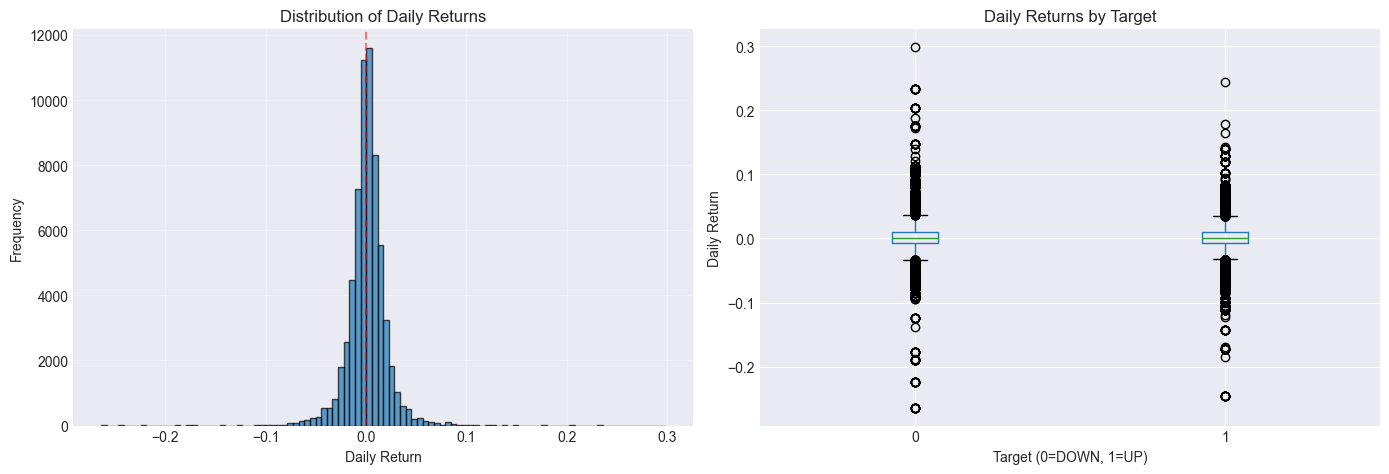

Daily Return Statistics:
count    64232.000000
mean         0.000934
std          0.020670
min         -0.263901
25%         -0.007434
50%          0.001056
75%          0.009753
max          0.298067
Name: Daily_Return, dtype: float64


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

df_features['Daily_Return'].hist(bins=100, ax=axes[0], edgecolor='black', alpha=0.7)
axes[0].set_title('Distribution of Daily Returns')
axes[0].set_xlabel('Daily Return')
axes[0].set_ylabel('Frequency')
axes[0].axvline(0, color='red', linestyle='--', alpha=0.5)
axes[0].grid(True, alpha=0.3)

df_features.boxplot(column='Daily_Return', by='Target', ax=axes[1])
axes[1].set_title('Daily Returns by Target')
axes[1].set_xlabel('Target (0=DOWN, 1=UP)')
axes[1].set_ylabel('Daily Return')
plt.suptitle('')

plt.tight_layout()
plt.show()

print(f"Daily Return Statistics:")
print(df_features['Daily_Return'].describe())

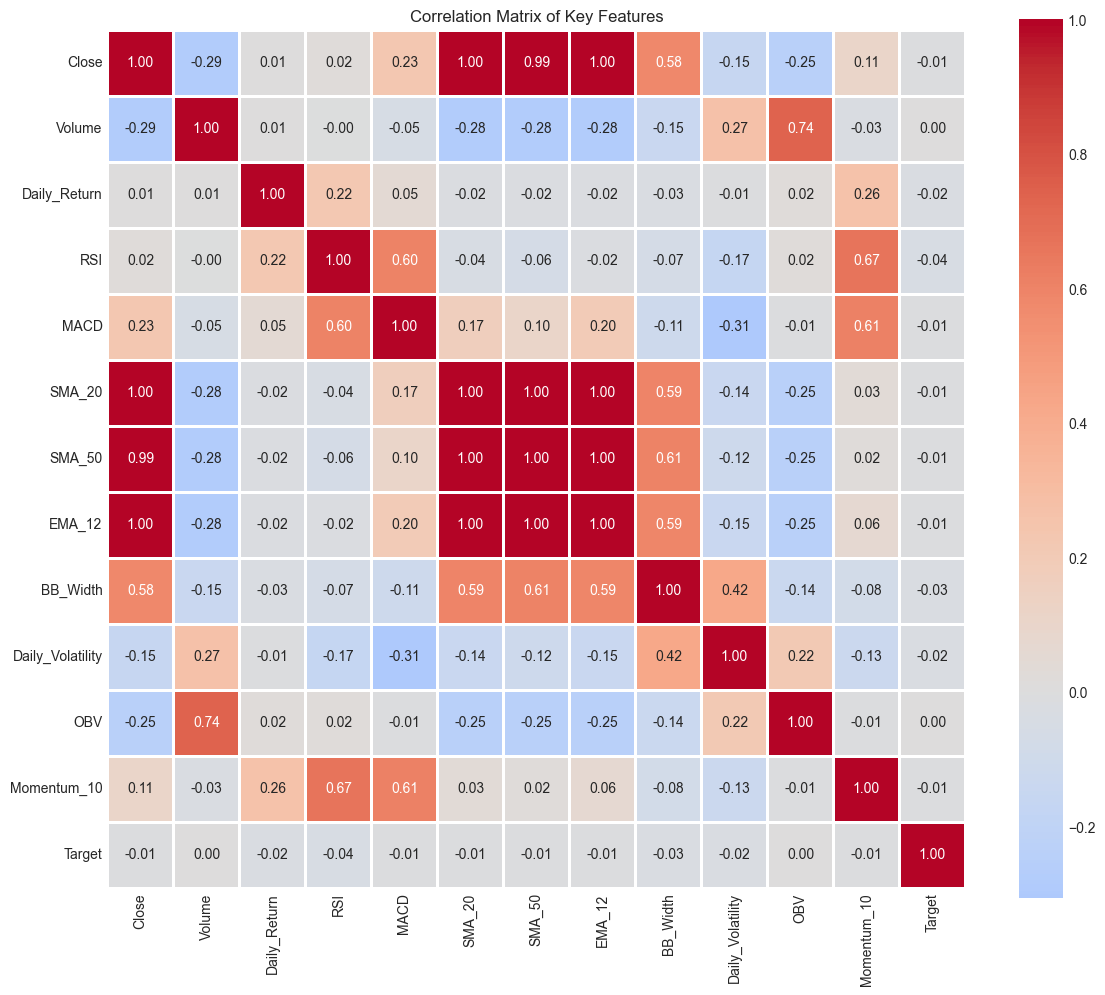


Features most correlated with Target:
RSI                 0.035922
BB_Width            0.028809
Daily_Volatility    0.023593
Daily_Return        0.022337
Close               0.013495
Momentum_10         0.012783
EMA_12              0.012721
MACD                0.012612
SMA_20              0.012276
SMA_50              0.011830
Name: Target, dtype: float64


In [ ]:
numerical_cols = df_features.select_dtypes(include=[np.number]).columns.tolist()
if 'Target' in numerical_cols:
    numerical_cols.remove('Target')

key_features = ['Close', 'Volume', 'Daily_Return', 'RSI', 'MACD', 'SMA_20', 'SMA_50', 
                'EMA_12', 'BB_Width', 'Daily_Volatility', 'OBV', 'Momentum_10', 'Target']

key_features = [f for f in key_features if f in df_features.columns]

plt.figure(figsize=(12, 10))
correlation_matrix = df_features[key_features].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1)
plt.title('Correlation Matrix of Key Features')
plt.tight_layout()
plt.show()

print("\nFeatures most correlated with Target:")
target_corr = correlation_matrix['Target'].drop('Target').abs().sort_values(ascending=False)
print(target_corr.head(10))

## 7. Feature Selection & Preparation

In [ ]:
exclude_cols = ['Date', 'Ticker', 'Target']

feature_columns = [col for col in df_features.columns if col not in exclude_cols]

print(f"Total features for modeling: {len(feature_columns)}")
print(f"\nFeature list:")
for i, col in enumerate(feature_columns, 1):
    print(f"{i}. {col}")

Total features for modeling: 43

Feature list:
1. Close
2. High
3. Low
4. Open
5. Volume
6. Daily_Return
7. Daily_Range
8. Price_Change
9. Day_of_Week
10. Month
11. Year
12. Daily_Volatility
13. SMA_20
14. SMA_50
15. SMA_200
16. EMA_12
17. EMA_26
18. MACD
19. MACD_Signal
20. RSI
21. BB_Upper
22. BB_Lower
23. BB_Width
24. OBV
25. Close_Lag1
26. Close_Lag2
27. Close_Lag3
28. Volume_Lag1
29. Close_Roll_Mean_5
30. Close_Roll_Std_5
31. Close_Roll_Mean_10
32. Close_Roll_Std_10
33. Momentum_5
34. Momentum_10
35. Momentum_20
36. High_Low_Ratio
37. Close_Open_Ratio
38. Cumulative_Return_5
39. Cumulative_Return_10
40. Volume_MA_20
41. Volume_Ratio_20
42. Price_Volume_Interaction
43. Volatility_Volume_Interaction


## 8. Data Preprocessing - Scaling

In [ ]:
X = df_features[feature_columns]
y = df_features['Target']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

print(f"\nChecking for infinity values...")
inf_cols = X.columns[np.isinf(X).any()].tolist()
if inf_cols:
    print(f"Columns with infinity: {inf_cols}")

    X = X.replace([np.inf, -np.inf], np.nan)
    X = X.dropna()
    y = y.loc[X.index]
    print(f"After removing infinity: X shape = {X.shape}")
else:
    print("No infinity values found.")

print("\nApplying MinMaxScaler...")
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=feature_columns, index=X.index)

print("Scaling complete!")
print(f"\nScaled features shape: {X_scaled_df.shape}")
print(f"\nFirst few rows of scaled data:")
X_scaled_df.head()

Features shape: (64232, 43)
Target shape: (64232,)

Checking for infinity values...
No infinity values found.

Applying MinMaxScaler...
Scaling complete!

Scaled features shape: (64232, 43)

First few rows of scaled data:


,Close,High,Low,Open,Volume,Daily_Return,Daily_Range,Price_Change,Day_of_Week,Month,Year,Daily_Volatility,SMA_20,SMA_50,SMA_200,EMA_12,EMA_26,MACD,MACD_Signal,RSI,BB_Upper,BB_Lower,BB_Width,OBV,Close_Lag1,Close_Lag2,Close_Lag3,Volume_Lag1,Close_Roll_Mean_5,Close_Roll_Std_5,Close_Roll_Mean_10,Close_Roll_Std_10,Momentum_5,Momentum_10,Momentum_20,High_Low_Ratio,Close_Open_Ratio,Cumulative_Return_5,Cumulative_Return_10,Volume_MA_20,Volume_Ratio_20,Price_Volume_Interaction,Volatility_Volume_Interaction
20,0.113136,0.113526,0.113858,0.113229,0.003018,0.464575,0.010043,0.364527,1.00,0.636364,0.0,0.050081,0.116497,0.116796,0.112783,0.116940,0.117743,0.608805,0.631587,0.435413,0.110408,0.117647,0.013764,0.003415,0.113460,0.113887,0.112895,0.003211,0.114412,0.004882,0.115834,0.008160,0.676162,0.608497,0.668909,0.019373,0.412111,0.467424,0.471855,0.018880,0.042264,0.013229,0.000576
21,0.113683,0.114146,0.113699,0.112979,0.003749,0.478098,0.019791,0.371633,0.00,0.636364,0.0,0.049944,0.116616,0.116945,0.112886,0.116975,0.117852,0.607913,0.630359,0.551998,0.110281,0.118034,0.012123,0.003552,0.113136,0.113460,0.113887,0.003018,0.114458,0.005233,0.115729,0.007351,0.682349,0.610107,0.668823,0.058050,0.438310,0.486031,0.477214,0.018698,0.059047,0.016633,0.000713
22,0.113887,0.114386,0.114765,0.114073,0.003457,0.472754,0.009579,0.363700,0.25,0.636364,0.0,0.049114,0.116766,0.117152,0.112966,0.117037,0.117968,0.607262,0.629227,0.611155,0.109980,0.118674,0.009096,0.003678,0.113683,0.113136,0.113460,0.003749,0.114659,0.004137,0.115664,0.006640,0.685581,0.611515,0.670178,0.017235,0.409102,0.495782,0.481847,0.018507,0.053374,0.015331,0.000652
23,0.113062,0.114016,0.113681,0.114036,0.003169,0.456867,0.018399,0.356676,0.50,0.636364,0.0,0.039626,0.116773,0.117321,0.113049,0.116959,0.118012,0.605752,0.627974,0.411132,0.109973,0.118696,0.009001,0.003562,0.113887,0.113683,0.113136,0.003457,0.114492,0.004574,0.115532,0.006547,0.677856,0.609134,0.663704,0.052544,0.383441,0.472441,0.473984,0.016712,0.054343,0.013903,0.000534
24,0.113442,0.113720,0.113690,0.112784,0.002759,0.475509,0.014569,0.371220,0.75,0.636364,0.0,0.031307,0.116720,0.117506,0.113138,0.116953,0.118082,0.604821,0.626758,0.374447,0.109889,0.118681,0.008761,0.003664,0.113062,0.113887,0.113683,0.003169,0.114488,0.004573,0.115437,0.005599,0.681285,0.610442,0.661016,0.037365,0.436827,0.482787,0.478331,0.013682,0.058801,0.012087,0.000416


## 9. Train-Test Split

In [ ]:
df_sorted = df_features.loc[X_scaled_df.index].sort_values('Date')
X_scaled_sorted = X_scaled_df.loc[df_sorted.index]
y_sorted = y.loc[df_sorted.index]

split_idx = int(len(X_scaled_sorted) * 0.8)

X_train = X_scaled_sorted.iloc[:split_idx]
X_test = X_scaled_sorted.iloc[split_idx:]
y_train = y_sorted.iloc[:split_idx]
y_test = y_sorted.iloc[split_idx:]

train_dates = df_sorted.iloc[:split_idx]['Date']
test_dates = df_sorted.iloc[split_idx:]['Date']

print("Train-Test Split Summary:")
print("="*60)
print(f"Training set size: {len(X_train)} samples")
print(f"Training date range: {train_dates.min()} to {train_dates.max()}")
print(f"Training target distribution: DOWN={sum(y_train==0)}, UP={sum(y_train==1)}")
print(f"\nTest set size: {len(X_test)} samples")
print(f"Test date range: {test_dates.min()} to {test_dates.max()}")
print(f"Test target distribution: DOWN={sum(y_test==0)}, UP={sum(y_test==1)}")
print("="*60)

Train-Test Split Summary:
Training set size: 51385 samples
Training date range: 2016-08-19 00:00:00 to 2023-12-05 00:00:00
Training target distribution: DOWN=23968, UP=27417

Test set size: 12847 samples
Test date range: 2023-12-05 00:00:00 to 2025-10-03 00:00:00
Test target distribution: DOWN=6074, UP=6773


## 10. Save Preprocessed Data

In [ ]:

import pickle

X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open('feature_names.txt', 'w') as f:
    f.write('\n'.join(feature_columns))

df_features.to_csv('fully_processed_stock_data.csv', index=False)

print("All preprocessed data saved successfully!")
print("\nFiles saved:")
print("  - X_train.csv")
print("  - X_test.csv")
print("  - y_train.csv")
print("  - y_test.csv")
print("  - scaler.pkl")
print("  - feature_names.txt")
print("  - fully_processed_stock_data.csv")

All preprocessed data saved successfully!

Files saved:
  - X_train.csv
  - X_test.csv
  - y_train.csv
  - y_test.csv
  - scaler.pkl
  - feature_names.txt
  - fully_processed_stock_data.csv


## 11. Summary Statistics

In [13]:
print("\n" + "="*60)
print("PREPROCESSING SUMMARY")
print("="*60)
print(f"\nOriginal dataset:")
print(f"  - Total records: {df.shape[0]}")
print(f"  - Total features: {df.shape[1]}")
print(f"  - Tickers: {df['Ticker'].nunique()}")

print(f"\nAfter feature engineering:")
print(f"  - Total records: {df_features.shape[0]}")
print(f"  - Total features: {df_features.shape[1]}")
print(f"  - Features for modeling: {len(feature_columns)}")

print(f"\nFinal train/test split:")
print(f"  - Training samples: {len(X_train)} ({len(X_train)/(len(X_train)+len(X_test))*100:.1f}%)")
print(f"  - Test samples: {len(X_test)} ({len(X_test)/(len(X_train)+len(X_test))*100:.1f}%)")

print(f"\nClass balance:")
print(f"  - Training: DOWN={sum(y_train==0)/len(y_train)*100:.1f}%, UP={sum(y_train==1)/len(y_train)*100:.1f}%")
print(f"  - Test: DOWN={sum(y_test==0)/len(y_test)*100:.1f}%, UP={sum(y_test==1)/len(y_test)*100:.1f}%")
print("="*60)
print("\nData is ready for model building!")
print("Proceed to the next notebook for model training and evaluation.")


PREPROCESSING SUMMARY

Original dataset:
  - Total records: 64792
  - Total features: 27
  - Tickers: 28

After feature engineering:
  - Total records: 64232
  - Total features: 46
  - Features for modeling: 43

Final train/test split:
  - Training samples: 51385 (80.0%)
  - Test samples: 12847 (20.0%)

Class balance:
  - Training: DOWN=46.6%, UP=53.4%
  - Test: DOWN=47.3%, UP=52.7%

Data is ready for model building!
Proceed to the next notebook for model training and evaluation.
